# Plotting the training set simulations

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import euclidemu2 as ee2

In [12]:
# Load reference simulation
ref_path = "/home/grads/data/victoria/w0wa_test/sims/"
k, pk_nl_ref, pk_lin_ref = np.loadtxt(f"{ref_path}/a/pofk_run_ref_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2), skiprows=2)
boost_ref_cola = pk_nl_ref/pk_lin_ref
params = {
    "h": 0.67,
    "Omega_b": 0.049,
    "Omega_m": 0.319,
    "As": 2.1e-9,
    "ns": 0.96,
    "w": -1,
    "wa": 0,
    "mnu": 0.058
}
k, boost_ref_ee2 = ee2.get_boost(params, [0], k)
# ref_b = np.loadtxt(f"{ref_path}/b/pofk_run_ref_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2))

In [19]:
# Load COLA simulations
lhs = np.loadtxt("../lhs.txt")
simulations_path = os.path.expanduser("~/data/victoria/cola_projects/train_700/output")
phase_a = {}
for i in range(700):
    try:
        phase_a[i] = np.loadtxt(f"{simulations_path}/a/{i}/pofk_run_{i}_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2), skiprows=2)
        # phase_b.append(np.loadtxt(f"{simulations_path}/b/{i}/pofk_run_{i}_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2), skiprows=2))
    except FileNotFoundError as err:
        continue

In [21]:
print(phase_a.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 600, 601, 602, 603, 604, 605,

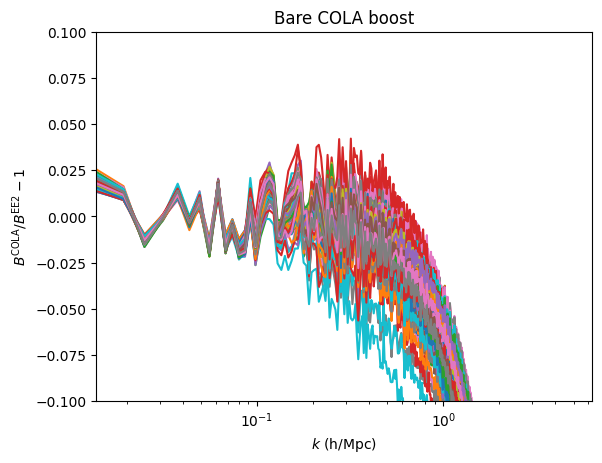

In [26]:
# Plot B^COLA directly
for index, sim in phase_a.items():
    k, pk_nl_a, pk_lin = sim
    h, Omegab, Omegam, As, ns, w, wa = lhs[index]
    params = {
        'As': As,
        'ns': ns,
        'Omb': Omegab,
        'Omm': Omegam,
        'h': h,
        'w': w,
        'wa': wa,
        'mnu': 0.058,
    }
    try:
        k, boost_ee2 = ee2.get_boost(params, [0], k)
    except ValueError:
        continue
    boost_cola = pk_nl_a/pk_lin
    plt.semilogx(k, boost_cola/boost_ee2[0] - 1)

plt.xlabel(r"$k$ (h/Mpc)")
plt.ylabel(r"$B^\mathrm{COLA}/B^\mathrm{EE2} - 1$")
plt.xlim([k[0], k[-1]])
plt.ylim([-0.1, 0.1])
plt.title("Bare COLA boost")
plt.savefig("b_cola.pdf")

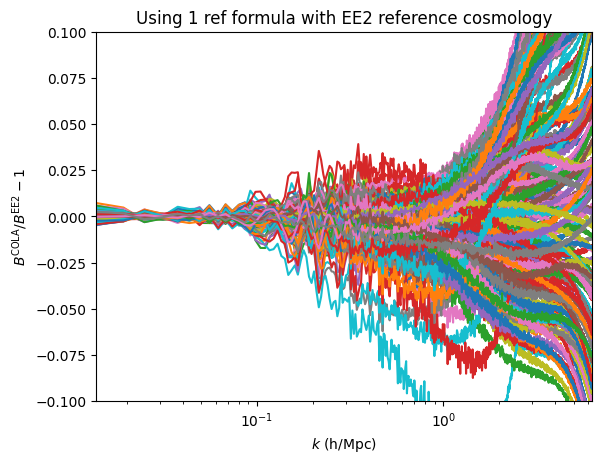

In [27]:
# Plot \tilde{B}^COLA (i.e. use the 1 ref formula)
for index, sim in phase_a.items():
    k, pk_nl_a, pk_lin = sim
    h, Omegab, Omegam, As, ns, w, wa = lhs[index]
    params = {
        'As': As,
        'ns': ns,
        'Omb': Omegab,
        'Omm': Omegam,
        'h': h,
        'w': w,
        'wa': wa,
        'mnu': 0.058,
    }
    try:
        k, boost_ee2 = ee2.get_boost(params, [0], k)
    except ValueError:
        continue
    boost_cola = pk_nl_a/pk_lin
    boost = boost_ref_ee2[0]*boost_cola/boost_ref_cola
    plt.semilogx(k, boost/boost_ee2[0] - 1)

plt.xlabel(r"$k$ (h/Mpc)")
plt.ylabel(r"$B^\mathrm{COLA}/B^\mathrm{EE2} - 1$")
plt.xlim([k[0], k[-1]])
plt.ylim([-0.1, 0.1])
plt.title("Using 1 ref formula with EE2 reference cosmology")
plt.savefig("b_cola_1ref.pdf")